# Data Manipulation and Visualization

*Foundations of Data Science*  
*Dr. Khalaj (Fall 2023)*  

### Description
In this homework you are supposed to get comfortable (or make sure that you are!) with the basic Python tools frequently used in data science.  

### Information  
Complete the information box below.

In [ ]:
full_name = 'Ali Aramideh'

In [ ]:
# Import all your libraries here
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import xlrd
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

from sklearn.preprocessing import LabelEncoder

## Another LEGO brick in the wall
LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following diagram.

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
* Load your data into `Pandas`  

* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### 1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

In [ ]:
df_colors = pd.read_csv('data/lego/colors.csv')
df_inventories = pd.read_csv('data/lego/inventories.csv')
df_inventory_parts = pd.read_csv('data/lego/inventory_parts.csv')
df_inventory_sets = pd.read_csv('data/lego/inventory_sets.csv')
df_part_categories = pd.read_csv('data/lego/part_categories.csv')
df_parts = pd.read_csv('data/lego/parts.csv')
df_sets = pd.read_csv('data/lego/sets.csv')
df_themes = pd.read_csv('data/lego/themes.csv')

### 2. Cleaning phase
Explore the following columns from your dataset:

* sets: year  

* inventory_parts: quantity  
  
Answer the following questions using data visualizations and manipulations. The code for this part is required alongside your explanations either in comments or markdown.  
1. What is the time range of the sets?  

2. What is the average quantity of the inventory parts?
3. Do you see any inconsistencies?
4. Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset.

First I explore columns for myself, after that I am going to answer your questions.

In [ ]:
# Observe the data set:
df_sets

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12
...,...,...,...,...,...
11668,Wauwatosa-1,"LEGO Store Grand Opening Exclusive Set, Mayfai...",-2012,408,15
11669,WHITEHOUSE-1,Micro White House,-2015,598,59
11670,Wiesbaden-1,"LEGO Store Grand Opening Exclusive Set, Wiesba...",2010,408,146
11671,WishingWell-1,Wishing Well [Toys R Us Promo],-2013,494,28


In [ ]:
# Observe the data set:
df_inventory_parts

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f
...,...,...,...,...,...
580246,18708,99206,0,3.0,f
580247,18708,99207,71,4.0,f
580248,18708,99780,15,4.0,f
580249,18708,99780,0,9.0,f


In [ ]:
# Explore 'year' column of sets:
data_type_year_sets = df_sets['year'].dtype
missing_values_year_sets = df_sets['year'].isnull().sum()
unique_values_year_sets = df_sets['year'].unique()
value_counts_year_sets = df_sets['year'].value_counts()
summary_statistics_year_sets = df_sets['year'].describe()

In [ ]:
# Explore 'quantity' column of inventory_parts:
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].replace(-float('inf'), float('nan'))
print(f"number of nan in quantity column before change nans: {df_inventory_parts['quantity'].isna().sum()}")
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].fillna(df_inventory_parts['quantity'].mean())
print(f"number of nan in quantity column after change nans: {df_inventory_parts['quantity'].isna().sum()}")
# Note: If you run twice, you will observe both value zero.

data_type_quantity_inventory_parts = df_inventory_parts['quantity'].dtype
missing_values_quantity_inventory_parts= df_inventory_parts['quantity'].isnull().sum()
unique_values_quantity_inventory_parts = df_inventory_parts['quantity'].unique()
value_counts_quantity_inventory_parts = df_inventory_parts['quantity'].value_counts()
summary_statistics_quantity_inventory_parts = df_inventory_parts['quantity'].describe()

number of nan in quantity column before change nans: 161796
number of nan in quantity column after change nans: 0


In [ ]:
# For 'Year' Column:
print('data_type_year_sets: ', data_type_year_sets)
print('##---------------------------------------------------------------------------')

print('missing_values_year_sets: ', missing_values_year_sets)
print('##---------------------------------------------------------------------------')

print('unique_values_year_sets :', unique_values_year_sets)

data_type_year_sets:  object
##---------------------------------------------------------------------------
missing_values_year_sets:  0
##---------------------------------------------------------------------------
unique_values_year_sets : ['70s' '1978' '1987' '1979' '19788' '1976' '1965' '1985' '1968' '1999'
 '1967' '1969' '2001' '20011' '1966' '2003' '2002' '20022' '-2003' '20033'
 '-2002' '20044' '2004' '2006' '20055' '2005' '-2004' '-2006' '-2010'
 '-2005' '20066' '2007' '20077' '2008' '20088' '-2009' '2009' '20099'
 '2010' '20100' '-2011' '2011' '20111' '2012' '20122' '-2013' '2013'
 '20133' '20144' '-20144' '2015' '2014' '-2014' '20155' '-2015' '2016'
 '20166' '-2016' '2017' '1977' '1983' '1986' '1984' '1973' '-2012'
 '-20155' '1981' '-2000' '80s' '1982' '1988' '20177' '-2017' '-1999'
 '19999' '-1986' '1997' '1998' '1971' '-1966' '-1977' '-1981' '-1985'
 '20000' '2000' '-20000' '1955' '1956' '1957' '-1982' '-1969' '19822'
 '19555' '1958' '-2001' '1974' '1972' '19988' '-1998' '198

In [ ]:
# For 'quantity' Column:
print('data_type_quantity_inventory_parts: ', data_type_quantity_inventory_parts)
print('##---------------------------------------------------------------------------')

print('missing_values_quantity_inventory_parts: ', missing_values_quantity_inventory_parts)
print('##---------------------------------------------------------------------------')

print('unique_values_quantity_inventory_parts :', unique_values_quantity_inventory_parts)

data_type_quantity_inventory_parts:  float64
##---------------------------------------------------------------------------
missing_values_quantity_inventory_parts:  0
##---------------------------------------------------------------------------
unique_values_quantity_inventory_parts : [1.00000000e+00 3.83693826e+00 4.00000000e+00 5.00000000e+00
 3.00000000e+00 6.00000000e+00 5.00000000e+01 7.00000000e+00
 2.40000000e+01 8.00000000e+00 9.00000000e+00 1.60000000e+01
 1.40000000e+01 1.27000000e+02 4.40000000e+01 1.00000000e+01
 4.00000000e+01 1.14000000e+02 2.00000000e+01 2.80000000e+01
 1.80000000e+01 1.90000000e+01 1.50000000e+01 1.10000000e+01
 1.20000000e+01 1.30000000e+01 4.60000000e+01 2.10000000e+01
 1.70000000e+01 1.03000000e+02 3.20000000e+01 8.50000000e+01
 3.70000000e+01 3.00000000e+01 2.30000000e+01 6.00000000e+01
 3.60000000e+01 7.20000000e+01 6.40000000e+01 5.20000000e+01
 2.40000000e+02 6.90000000e+01 1.02000000e+02 4.80000000e+01
 2.16000000e+02 2.20000000e+01 6.10000000e+

In [ ]:
# For 'year' Column:
# To observe values count of year in sets dataset
print(value_counts_year_sets)

2012      394
2013      386
2015      380
2014      379
2016      363
         ... 
-1988       1
-1971       1
-20077      1
-19977      1
19699       1
Name: year, Length: 174, dtype: int64


In [ ]:
# For 'quantity' Column:
# To observe values count of quantity in sets dataset
print(value_counts_quantity_inventory_parts)

1.000000      239479
3.836938      161796
4.000000       62072
3.000000       31219
6.000000       20144
               ...  
344.000000         1
415.000000         1
346.000000         1
327.000000         1
509.000000         1
Name: quantity, Length: 239, dtype: int64


In [ ]:
print('Summary statistics for year column')
print(summary_statistics_year_sets)
print('##---------------------------------------------------------------------------')

print('Summary statistics for quantity column')
print(summary_statistics_quantity_inventory_parts)

Summary statistics for year column
count     11673
unique      174
top        2012
freq        394
Name: year, dtype: object
##---------------------------------------------------------------------------
Summary statistics for quantity column
count    580251.000000
mean          3.836938
std           8.188488
min           1.000000
25%           1.000000
50%           3.836938
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64


#### 1: What is the time range of the sets?


In [ ]:
# Q1:

# Calculate the time range
min_year = df_sets['year'].min()
max_year = df_sets['year'].max()
print(f"Time Range of Sets: {min_year} to {max_year}")
# Output: {Time Range of Sets: -1962 to 80s}!!!
# But we do not have negative year or 80s. So we should clean this column. I think after that you will want it :)

Time Range of Sets: -1962 to 80s


Therefor, we should clean year column!

#### 2: What is the average quantity of the inventory parts?


In [ ]:
# Q2:
# Calculate the average quantity of inventory parts
average_quantity = df_inventory_parts['quantity'].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")

Average Quantity of Inventory Parts: -inf


Therefoe, Exist -inf or nan values(but I check there is not nan value).

According to dataset, there is not $0$ in quantity column, so I think -inf should be $0$:

In [ ]:
df_inventory_parts['quantity'] = df_inventory_parts['quantity'].replace(-float('inf'), 0)

In [ ]:
# Calculate the average quantity of inventory parts
average_quantity = df_inventory_parts['quantity'].mean()
print(f"Average Quantity of Inventory Parts: {average_quantity:.2f}")

Average Quantity of Inventory Parts: 2.77


Let me calcuate the average quantity again

#### 3,4: Do you see any inconsistencies? Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset

Yes, as I mentioned, in `year` column there are values that is not true for year:

In [ ]:
df_sets['year'].unique() # dtype=object -> we should use regex method

array(['70s', '1978', '1987', '1979', '19788', '1976', '1965', '1985',
       '1968', '1999', '1967', '1969', '2001', '20011', '1966', '2003',
       '2002', '20022', '-2003', '20033', '-2002', '20044', '2004',
       '2006', '20055', '2005', '-2004', '-2006', '-2010', '-2005',
       '20066', '2007', '20077', '2008', '20088', '-2009', '2009',
       '20099', '2010', '20100', '-2011', '2011', '20111', '2012',
       '20122', '-2013', '2013', '20133', '20144', '-20144', '2015',
       '2014', '-2014', '20155', '-2015', '2016', '20166', '-2016',
       '2017', '1977', '1983', '1986', '1984', '1973', '-2012', '-20155',
       '1981', '-2000', '80s', '1982', '1988', '20177', '-2017', '-1999',
       '19999', '-1986', '1997', '1998', '1971', '-1966', '-1977',
       '-1981', '-1985', '20000', '2000', '-20000', '1955', '1956',
       '1957', '-1982', '-1969', '19822', '19555', '1958', '-2001',
       '1974', '1972', '19988', '-1998', '19877', '19855', '19777',
       '1975', '-1987', '-1979'

In [ ]:
# Remove the negative sign:
df_sets['year'] = df_sets['year'].str.replace('-','')

# Convert decades:
# Define a function to replace decades with their middle years
def replace_decades_with_middle(year_str):
    if re.match(r'\d{2}s', year_str):
        decade = int(year_str[:1])
        middle_year = 1900 + (decade * 10) + 5
        return str(middle_year)
    return year_str
df_sets['year'] = df_sets['year'].apply(replace_decades_with_middle)

#  Remove all characters after the 4th character in the 'year' column
# Define a function to clean the 'year' column
def clean_year(year_str):
    return year_str[:4]

# Apply the function to the 'year' column
df_sets['year'] = df_sets['year'].apply(clean_year)

In [ ]:
df_sets['year'].unique()

array(['1975', '1978', '1987', '1979', '1976', '1965', '1985', '1968',
       '1999', '1967', '1969', '2001', '1966', '2003', '2002', '2004',
       '2006', '2005', '2010', '2007', '2008', '2009', '2011', '2012',
       '2013', '2014', '2015', '2016', '2017', '1977', '1983', '1986',
       '1984', '1973', '1981', '2000', '1982', '1988', '1997', '1998',
       '1971', '1955', '1956', '1957', '1958', '1974', '1972', '1992',
       '1991', '1989', '1990', '1993', '1994', '1996', '1995', '1959',
       '1962', '1961', '1960', '1963', '1964', '1980', '1950', '1953',
       '1954'], dtype=object)

And `quantity` column had -inf values that I removed them

In [ ]:
df_inventory_parts['quantity'].describe()

count    580251.000000
mean          2.767054
std           8.367304
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        1440.000000
Name: quantity, dtype: float64

Everything seems to be correct

This part

**Explain your approach and assumptions once this section is completed.**

At the first I explore datasets (sets, inventory_parts) for myself; I tried to get information about columns `year` and `quantity` such describe statistics parameters, distribution of them etc.

After that I should answer four questions that mentioned, so I did :)

You can observe and read all things in code blocks; Please read comments.

### 3. Querying phase
Answer the following queries using the functionality of `Pandas`:

* List the IDs of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).  

* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).  

* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.  

* Create a scatter plot of the **luminance** of the sets vs their publishing year. After it is done, briefly answer the following questions:
  1. Do you see a trend over the last years?  
  
  2. How do you interpret it?

The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

In [ ]:
# 1
# Find the IDs of inventories for sets with names containing "car"
car_sets = df_sets[df_sets['name'].str.contains('car |cars ', case=False)]
car_inventory_ids = car_sets['id'].unique()
car_inventory_ids

array(['10022-1', '10025-1', '10200-1', '10665-1', '10673-1', '1253-1',
       '1255-1', '1353-1', '147-1', '1477-1', '1489-1', '1518-1', '157-3',
       '167-1', '1966-1', '2824-20', '2824-22', '2995-1', '3226-1',
       '353-1', '3581-1', '3641-1', '3714-1', '379-2', '3915-1', '4117-1',
       '4166-1', '4435-1', '4544-1', '5898-1', '623-2', '650-1', '656-1',
       '660-1', '66386-1', '66387-1', '66392-1', '66409-1', '6694-1',
       '7033-1', '70819-1', '7236-2', '7553-16', '7553-17', '7553-18',
       '75821-1', '7687-21', '7839-1', '7907-15', '8286-1', '850953-1',
       '8634-1', '8803-11', '8860-1', '9678-1', '9685-1', '970674-1'],
      dtype=object)

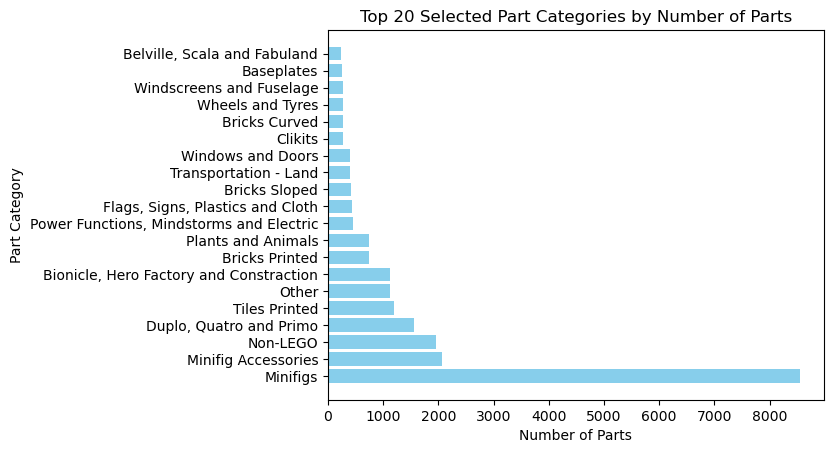

In [ ]:
# 2
# Select top20 categories
top20_part_cat_id = df_parts['part_cat_id'].value_counts().sort_values(ascending=False).head(20)
# Select part category names based on the specified IDs
selected_category_ids = [13, 27, 17, 4, 10, 24, 41, 2, 28, 45, 38, 3, 36, 16, 48, 37, 29, 47, 1, 42]
selected_part_categories = df_part_categories[df_part_categories['id'].isin(selected_category_ids)]
# Reindex the DataFrame based on the order of IDs
selected_part_categories = selected_part_categories.set_index('id').loc[selected_category_ids]
# Reset the index to have the DataFrame sorted by the specified order
selected_part_categories = selected_part_categories.reset_index()
selected_part_categories['number'] = top20_part_cat_id.values
# Plot
plt.barh(selected_part_categories['name'], selected_part_categories['number'], color='skyblue')
plt.xlabel('Number of Parts')
plt.ylabel('Part Category')
plt.title('Top 20 Selected Part Categories by Number of Parts')
plt.show()

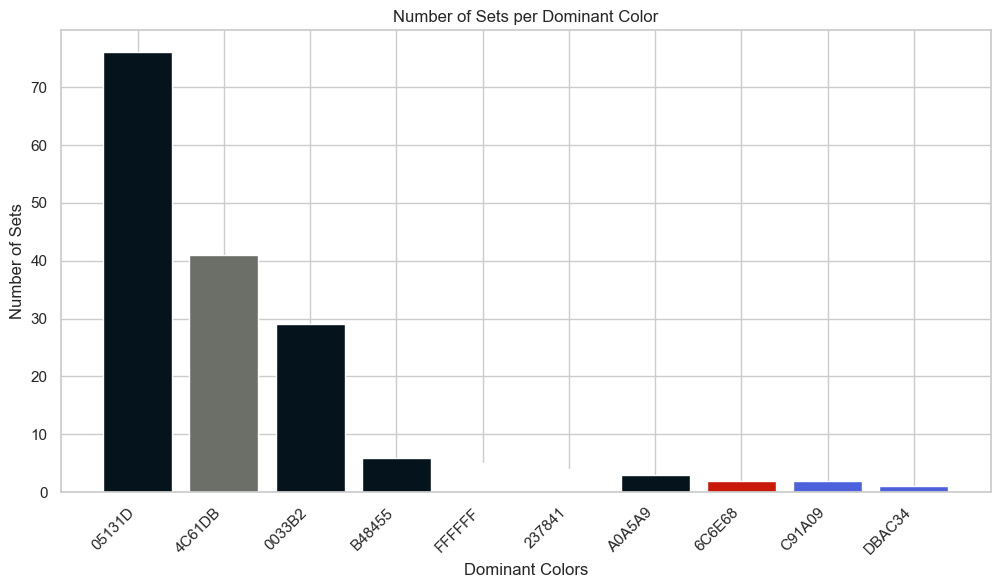

In [ ]:
#3
# Merge relevant DataFrames to get necessary information
merged_df = pd.merge(df_inventory_sets, df_inventory_parts, on='inventory_id')
merged_df = pd.merge(merged_df, df_colors, left_on='color_id', right_on='id')

# Group the data by set and find the dominant color for each set
dominant_colors = merged_df.groupby(['set_id', 'name', 'rgb', 'color_id'])['quantity_y'].sum().reset_index()
dominant_colors = dominant_colors.loc[dominant_colors.groupby('set_id')['quantity_y'].idxmax()]

# Convert hexadecimal colors to RGBA
dominant_colors['rgba'] = dominant_colors['rgb'].apply(lambda x: mcolors.to_rgba('#' + x))

# Count the number of sets per dominant color
sets_per_color = dominant_colors['rgb'].value_counts()

# Plot the bar chart
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(sets_per_color.index, sets_per_color, color=dominant_colors.set_index('rgb')['rgba'])

# Set labels and title
ax.set_xlabel('Dominant Colors')
ax.set_ylabel('Number of Sets')
ax.set_title('Number of Sets per Dominant Color')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

plt.show()

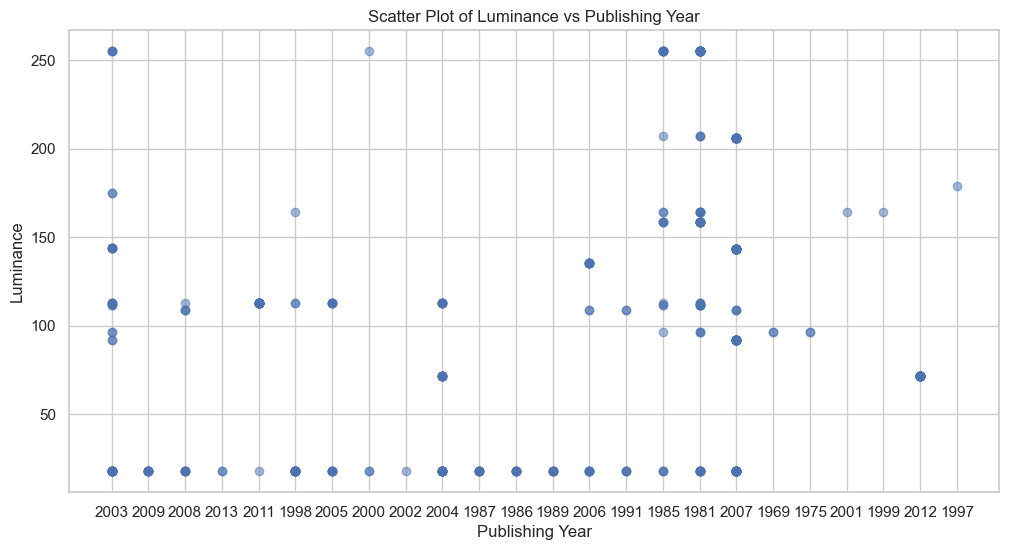

In [ ]:
#4
# Merge relevant DataFrames to get necessary information
merged_df = pd.merge(df_sets, df_inventory_sets, left_on='id', right_on='set_id')
merged_df = pd.merge(merged_df, df_inventory_parts, on='inventory_id')
merged_df = pd.merge(merged_df, df_colors, left_on='color_id', right_on='id')

# Extract RGB values from the 'rgb' column
merged_df[['r', 'g', 'b']] = pd.DataFrame(merged_df['rgb'].apply(lambda x: [int(x[i:i+2], 16) for i in (0, 2, 4)]).tolist(), index=merged_df.index)

# Calculate luminance based on RGB values
merged_df['luminance'] = np.sqrt(0.299 * merged_df['r']**2 + 0.587 * merged_df['g']**2 + 0.114 * merged_df['b']**2)

# Plot scatter plot
fig, ax = plt.subplots(figsize=(12, 6))
scatter = ax.scatter(merged_df['year'], merged_df['luminance'], alpha=0.5)

# Set labels and title
ax.set_xlabel('Publishing Year')
ax.set_ylabel('Luminance')
ax.set_title('Scatter Plot of Luminance vs Publishing Year')

plt.show()

**Explain your approach and assumptions once this section is completed.**

At the first we should search cars in our sataset so I did it but I observed that some things that do not be car be in our result such as 'cardbourd', 'card' etc. Therefore I use car+space or cars+space.

In the second part, first I selected top20 part categories and then I plotted barchart which is wanted.

For part 3 and 4 please read comments.